In [266]:
import pandas as pd
import glob
import os
import xarray as xr
# import salem 
from esmtools.grid import convert_lon
import matplotlib.pyplot as plt
# Dates
import matplotlib.dates as mdates
from collections import OrderedDict
# import seaborn as sns
import numpy as np
import pystuff as ps
# from oceans.filters import lanc
from utils import *
# import ruptures as rpt
# import pyhomogeneity as ph
import pystuff as ps
# Gaussian filter 1d
from scipy.ndimage import gaussian_filter1d



# options
plt.rcParams['font.size'] = 12
# plt.rcParams['font.family'] = 'Arial'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True
# plt.rcParams['figure.dpi'] = 150

In [319]:
# Abrir o banco de dados principal das anomalias
df = pd.read_excel('Anomalies_SST.xlsx', sheet_name='ALL')
df.set_index('Time', inplace=True)

In [320]:
shp = f'{os.environ["HOMEPATH"]}/OneDrive/Documentos/Shapefiles/IPCC_Regions_SA/IPCC_Regions_SA.shp'
df_shp = salem.read_shapefile(shp)
area = 'NSA' #
filter = df_shp.loc[df_shp['Acronym'] == area ]

In [321]:
filter_list = glob.glob(f'{os.environ["HOMEPATH"]}/OneDrive/climate_change/ETCCDI_Extremes/Mensal/*.nc')
filter_list_year = glob.glob(f'{os.environ["HOMEPATH"]}/OneDrive/climate_change/ETCCDI_Extremes/Anual/*.nc')
extremes_temp = ['txx', 'txn', 'tnx', 'tnn' , 'dtr', 'tx90p', 'tx10p', 'tn90p', 'tn10p', 'fd']
extremes_prec = ['r10mm', 'r20mm', 'r30mm', 'rx1day', 'rx5day', 'prcptot']
extremes_prec_year = ['sdii', 'r95p', 'r99p', 'cwd', 'cdd']
extremes_temp_year = ['wsdi', 'csdi']


# Get extremes in filter_list
filter_temp = [x for x in filter_list if any(extreme in x for extreme in extremes_temp)]
filter_prec = [x for x in filter_list if any(extreme in x for extreme in extremes_prec)]
filter_year_temp = [x for x in filter_list_year if any(extreme in x for extreme in extremes_temp_year)]
filter_year_prec = [x for x in filter_list_year if any(extreme in x for extreme in extremes_prec_year)]

In [322]:
df_new = pd.read_excel('DOC-Anomalies_SST.xlsx', sheet_name='ALL')
df_new.set_index('Time', inplace=True)

In [300]:
# start = '1979-01-01'
# end = '2020-12-01'
# freq = 'MS'


# for indice in filter_temp:

#     # Open dataset extremes
#     ds_extremes = xr.open_dataset(indice, decode_timedelta=False)

#     # Reorganize the time data
#     ds_extremes = fix_encoding_time(ds_extremes, start=start, end=end, freq=freq)
#     # Convert lon
#     ds_extremes = convert_lon(ds_extremes, coord='lon')

#     # Clip the dataset
#     ds_extremes = ds_extremes.salem.roi(shape=df_shp)
#     # Remove 'time_bnds' if exists
#     if 'time_bnds' in ds_extremes:
#         ds_extremes = ds_extremes.drop_vars('time_bnds')
#     else:
#         pass

#     df_tmp = ds_extremes[getvar(ds_extremes)].mean(dim=[
#         'lat', 'lon']).to_dataframe()
#     df[getvar(ds_extremes)] = df_tmp.values

In [323]:
start = '1979-01-01'
end = '2020-12-01'
freq = 'MS'


for indice in filter_prec:

    # Open dataset extremes
    ds_extremes = xr.open_dataset(indice, decode_timedelta=False)

    # Reorganize the time data
    ds_extremes = fix_encoding_time(ds_extremes, start=start, end=end, freq=freq)
    # Convert lon
    ds_extremes = convert_lon(ds_extremes, coord='lon')

    # Clip the dataset
    ds_extremes = ds_extremes.salem.roi(shape=df_shp)
    # Remove 'time_bnds' if exists
    if 'time_bnds' in ds_extremes:
        ds_extremes = ds_extremes.drop_vars('time_bnds')
    else:
        pass

    df_tmp = ds_extremes[getvar(ds_extremes)].mean(dim=[
        'lat', 'lon']).to_dataframe()
    df[getvar(ds_extremes)] = df_tmp.values

In [302]:
start = '1979-01-01'
end = '2020-12-01'
freq = 'YS'

df_year = pd.DataFrame()
df_year['Time'] = pd.date_range(start=start, end=end, freq=freq)
df_year.set_index('Time', inplace=True)
for indice in filter_year_temp:

    # Open dataset extremes
    ds_extremes = xr.open_dataset(indice, decode_timedelta=False)

    # Reorganize the time data
    ds_extremes = fix_encoding_time(ds_extremes, start=start, end=end, freq=freq)
    # Convert lon
    ds_extremes = convert_lon(ds_extremes, coord='lon')

    # Clip the dataset
    ds_extremes = ds_extremes.salem.roi(shape=df_shp)
    # Remove 'time_bnds' if exists
    if 'time_bnds' in ds_extremes:
        ds_extremes = ds_extremes.drop_vars('time_bnds')
    else:
        pass
    
    df_tmp = ds_extremes[getvar(ds_extremes)].mean(dim=[
        'lat', 'lon']).to_dataframe()
    df_year[getvar(ds_extremes)] = df_tmp.values

In [324]:
start = '1979-01-01'
end = '2020-12-01'
freq = 'YS'

df_year = pd.DataFrame()
df_year['Time'] = pd.date_range(start=start, end=end, freq=freq)
df_year.set_index('Time', inplace=True)
for indice in filter_year_prec:

    # Open dataset extremes
    ds_extremes = xr.open_dataset(indice, decode_timedelta=False)

    # Reorganize the time data
    ds_extremes = fix_encoding_time(
        ds_extremes, start=start, end=end, freq=freq)
    # Convert lon
    ds_extremes = convert_lon(ds_extremes, coord='lon')

    # Clip the dataset
    ds_extremes = ds_extremes.salem.roi(shape=df_shp)
    # Remove 'time_bnds' if exists
    if 'time_bnds' in ds_extremes:
        ds_extremes = ds_extremes.drop_vars('time_bnds')
    else:
        pass

    df_tmp = ds_extremes[getvar(ds_extremes)].mean(dim=[
        'lat', 'lon']).to_dataframe()
    df_year[getvar(ds_extremes)] = df_tmp.values


In [325]:
# EL NINO
idx_nino_start = df_new['Period'].isin(['Start-Nino'])
idx_nino_start = df_new.reset_index().index[idx_nino_start]
idx_nino_end = df_new['Period'].isin(['End-Nino'])
idx_nino_end = df_new.reset_index().index[idx_nino_end]

# LA NINA
idx_nina_start = df_new['Period'].isin(['Start-Nina'])
idx_nina_start = df_new.reset_index().index[idx_nina_start]
idx_nina_end = df_new['Period'].isin(['End-Nina'])
idx_nina_end = df_new.reset_index().index[idx_nina_end]

In [346]:
# Function for create a stripes to ENSO events
def stripes(df, ax, idx_start, idx_end, color_nino='firebrick', color_nina='navy',alpha=0.3):
    for i, j in zip(enumerate(idx_nino_start), enumerate(idx_nino_end)):
        ax.axvspan(df_new.index[idx_nino_start[i[0]]], df_new.index[idx_nino_end[j[0]]], color=color_nino, alpha=alpha,
                label='El Nino')

    for i, j in zip(enumerate(idx_nina_start), enumerate(idx_nina_end)):
        ax.axvspan(df_new.index[idx_nina_start[i[0]]], df_new.index[idx_nina_end[j[0]]], color=color_nina, alpha=alpha,
                label='La Nina')

def LowPassFilter(df, y, cutoff=2, dt=12):
    # Low-pass Lanczos Filter 3 years
    low, low_nonan = ps.lanczos(df[y], dt * cutoff, returnNonan=True)
    # Covert array to pandas series
    low = pd.Series(low)
    low.index = df.index
    return low

# function for plot the time series
def plot_ts(df, ax, y, color='k', label='INDEX', alpha=0.2, marker_size=4, filter=True, points=True):
    if filter:
        # Low-pass Lanczos Filter 2 years
        low = LowPassFilter(df, y, cutoff=2, dt=12)
        # df.resample('1Y').mean().plot(ax=ax, y=y, color='black', label=label, legend=False)
        low.plot(ax=ax, color=color, label='Low-pass Lanczos filter 2 years', legend=False)
    else:
        # # Low-pass Lanczos Filter 1 year
        # low = LowPassFilter(df, y, cutoff=0.1, dt=6)
        # low.plot(ax=ax, color=color, label='Low-pass Lanczos filter 1 year', legend=False)
        # Apply gaussian filter
        df['gaussian_filter'] = gaussian_filter1d(df[y], sigma=1.1)
        df.plot(ax=ax, y='gaussian_filter', color=color, label='Low-pass Lanczos filter 2 years', legend=False)
    if points:
        df.where(df['Dipolo'] == 'Fase Positiva').plot(ax=ax, y=y, style='o', markersize=marker_size,
                                                    label='Dipole Positive Phase', color='darkred', alpha=alpha, legend=False)
        df.where(df['Dipolo'] == 'Fase Negativa').plot(ax=ax, y=y, style='o', markersize=marker_size,
                                                    label='Dipole Negative Phase', color='darkblue', alpha=alpha, legend=False)

In [327]:
# Calculate bootstrap interval confidence
def bootstrap_interval(y, n=1000, alpha=0.05):
    # Calculate the mean
    mean = y.mean()
    # Calculate the standard deviation
    std = y.std()
    # Calculate the bootstrap
    bootstrap = np.random.normal(mean, std, n)
    # Calculate the confidence interval
    lower = round(np.percentile(bootstrap, alpha/2 * 100), 2)
    upper = round(np.percentile(bootstrap, (1 - alpha/2) * 100), 2)
    return lower, upper

In [328]:
df.columns

Index(['ONI', 'Condition', 'TNAI', 'TSAI', 'Dipolo', 'prcptot', 'r10mm',
       'r20mm', 'r30mm', 'rx1day', 'rx5day'],
      dtype='object')

In [329]:
asst_anual = df[['TNAI', 'TSAI']].resample('YS').mean()
asst_anual.loc[asst_anual['TNAI'] > asst_anual['TSAI'], 'Dipolo'] = 'Fase Positiva'
asst_anual.loc[asst_anual['TNAI'] < asst_anual['TSAI'], 'Dipolo'] = 'Fase Negativa'
# Concatenate the data
df_year_new = pd.concat([df_year, asst_anual], axis=1)
# df_year[['csdi', 'gaussian_filter']]

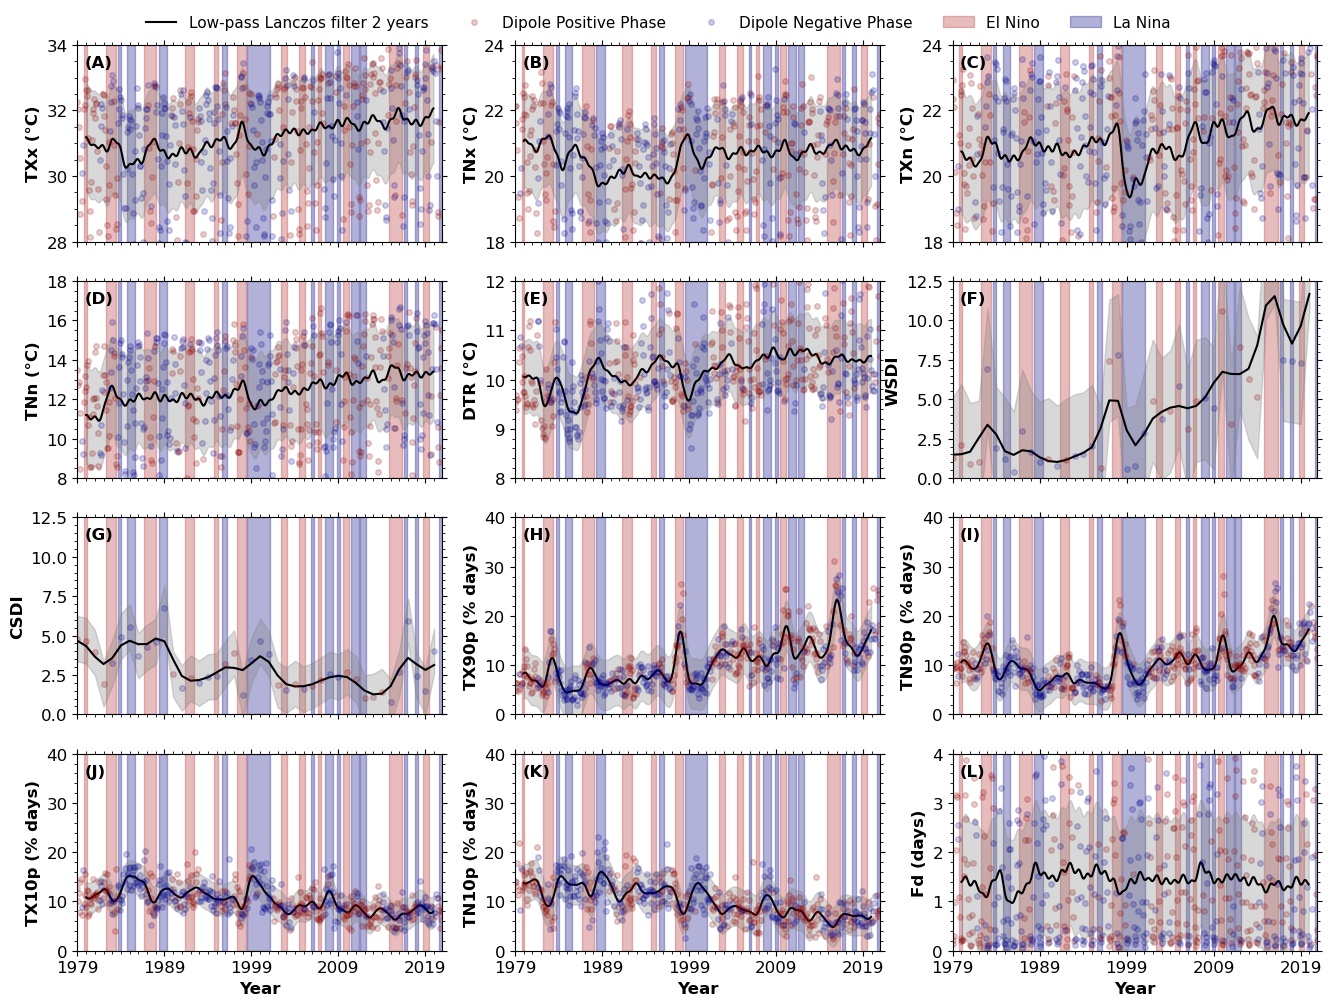

In [265]:
points = False
fig, axs = plt.subplots(figsize=(16, 12), nrows=4, ncols=3, sharex=True, dpi=100)
axs = axs.flatten()


var = 'txx'
# Plot the time series
plot_ts(df, axs[0], var, color='k', label=var, points=True)
stripes(df, axs[0], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[0].fill_between(df.index, df[var] - ((max_ + min_)/2),
#                  df[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[0].fill_between(df.index, filter - df[var].std(), filter + df[var].std(), color='grey', alpha=0.3)
axs[0].set_ylim(28, 34)
axs[0].set_ylabel('TXx (°C)', fontsize=12, fontweight='bold')

var = 'tnx'
# Plot the time series
plot_ts(df, axs[1], var, color='k', label=var, points=True)
stripes(df, axs[1], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[1].fill_between(df.index, df[var] - ((max_ + min_)/2),
#                  df[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[1].fill_between(df.index, filter - df[var].std(), filter + df[var].std(), color='grey', alpha=0.3)
axs[1].set_ylim(18, 24)
axs[1].set_ylabel('TNx (°C)', fontsize=12, fontweight='bold')

var = 'txn'
# Plot the time series
plot_ts(df, axs[2], var, color='k', label=var, points=True)
stripes(df, axs[2], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[2].fill_between(df.index, df[var] - ((max_ + min_)/2),
#                  df[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[2].fill_between(df.index, filter - df[var].std(), filter + df[var].std(), color='grey', alpha=0.3)
axs[2].set_ylim(18, 24)
axs[2].set_ylabel('TXn (°C)', fontsize=12, fontweight='bold')

var = 'tnn'
# Plot the time series
plot_ts(df, axs[3], var, color='k', label=var, points=True)
stripes(df, axs[3], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[3].fill_between(df.index, df[var] - ((max_ + min_)/2),
#                  df[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[3].fill_between(df.index, filter - df[var].std(), filter + df[var].std(), color='grey', alpha=0.3)
axs[3].set_ylim(8, 18)
axs[3].set_ylabel('TNn (°C)', fontsize=12, fontweight='bold')

var = 'dtr'
# Plot the time series
plot_ts(df, axs[4], var, color='k', label=var, points=True)
stripes(df, axs[4], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[4].fill_between(df.index, df[var] - ((max_ + min_)/2),
#                  df[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[4].fill_between(df.index, filter - df[var].std(), filter + df[var].std(), color='grey', alpha=0.3)
axs[4].set_ylim(8, 12)
axs[4].set_ylabel('DTR (°C)', fontsize=12, fontweight='bold')

var = 'wsdi'
# Plot the time series
plot_ts(df_year, axs[5], var, color='k', label=var , filter=False, points=points)
stripes(df, axs[5], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df_year, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
df_year_new.where(df['Dipolo'] == 'Fase Positiva').plot(ax=axs[5], y=var, style='o', markersize=4,
                                            label='Dipole Positive Phase', color='darkred', alpha=0.2, legend=False)
df_year_new.where(df['Dipolo'] == 'Fase Negativa').plot(ax=axs[5], y=var, style='o', markersize=4,
                                            label='Dipole Negative Phase', color='darkblue', alpha=0.2, legend=False)
# Fill time series by bootstrap interval
# axs[5].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[5].fill_between(df_year.index, df_year[var] - df_year[var].std(),
                    df_year[var] + df_year[var].std(), color='grey', alpha=0.3)
axs[5].set_ylim(0, 12.5)
axs[5].set_ylabel('WSDI', fontsize=12, fontweight='bold')

var = 'csdi'
# Plot the time series
plot_ts(df_year, axs[6], var, color='k', label=var, filter=False, points=points)
stripes(df, axs[6], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df_year, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
df_year_new.where(df['Dipolo'] == 'Fase Positiva').plot(ax=axs[6], y=var, style='o', markersize=4,
                                                        label='Dipole Positive Phase', color='darkred', alpha=0.2, legend=False)
df_year_new.where(df['Dipolo'] == 'Fase Negativa').plot(ax=axs[6], y=var, style='o', markersize=4,
                                                        label='Dipole Negative Phase', color='darkblue', alpha=0.2, legend=False)
# Fill time series by bootstrap interval
# axs[6].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[6].fill_between(df_year.index, df_year[var] - df_year[var].std(),
                    df_year[var] + df_year[var].std(), color='grey', alpha=0.3)
axs[6].set_ylim(0, 12.5)
axs[6].set_ylabel('CSDI', fontsize=12, fontweight='bold')

var = 'tx90p'
# Plot the time series
plot_ts(df, axs[7], var, color='k', label=var, filter=True, points=True)
stripes(df, axs[7], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[7].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[7].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)

axs[7].set_ylim(0, 40)
axs[7].set_ylabel('TX90p (% days)', fontsize=12, fontweight='bold')

var = 'tn90p'
# Plot the time series
plot_ts(df, axs[8], var, color='k', label=var, filter=True, points=True)
stripes(df, axs[8], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[8].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5) 
axs[8].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)
axs[8].set_ylim(0, 40)
axs[8].set_ylabel('TN90p (% days)', fontsize=12, fontweight='bold')

var = 'tx10p'
# Plot the time series
plot_ts(df, axs[9], var, color='k', label=var, filter=True, points=True)
stripes(df, axs[9], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[9].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[9].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)
axs[9].set_ylim(0, 40)
axs[9].set_ylabel('TX10p (% days)', fontsize=12, fontweight='bold')
axs[9].set_xlabel('Year', fontsize=12, fontweight='bold')

var = 'tn10p'
# Plot the time series
plot_ts(df, axs[10], var, color='k', label=var, filter=True, points=True)
stripes(df, axs[10], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[10].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[10].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)
axs[10].set_ylim(0, 40)
axs[10].set_ylabel('TN10p (% days)', fontsize=12, fontweight='bold')
axs[10].set_xlabel('Year', fontsize=12, fontweight='bold')

var = 'fd'
# Plot the time series
plot_ts(df, axs[11], var, color='k', label=var, filter=True, points=True)
stripes(df, axs[11], idx_nino_start, idx_nino_end, color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[11].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[11].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)
axs[11].set_ylim(0, 4)
axs[11].set_ylabel('Fd (days)', fontsize=12, fontweight='bold')
axs[11].set_xlabel('Year', fontsize=12, fontweight='bold')

# Change xticks frequency
axs[11].set_xticks(axs[11].get_xticks()[::2])

# Legenda
handles, labels = axs[11].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys(), loc='upper left', 
    frameon=False, ncol=5, fontsize=11, bbox_to_anchor=(0.15, 1.22))
# axs[11].set_xlim('1978-12-31', '2020-01-01')

ABC = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)', '(I)', '(J)', '(K)', '(L)']
for text, ax in zip(ABC, fig.axes):
    ax.text(0.02, 0.95, text, transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')

fig.set_facecolor('white')

# Save figure
# fig.savefig('Time_Series_Temp_Indices_SA.png', dpi=300, bbox_inches='tight')

In [ ]:
extremes_prec = ['r10mm', 'r20mm', 'r30mm', 'rx1day', 'rx5day', 'prpctot']
extremes_prec_year = ['sdii', 'r95p', 'r99p', 'cwd', 'cdd']


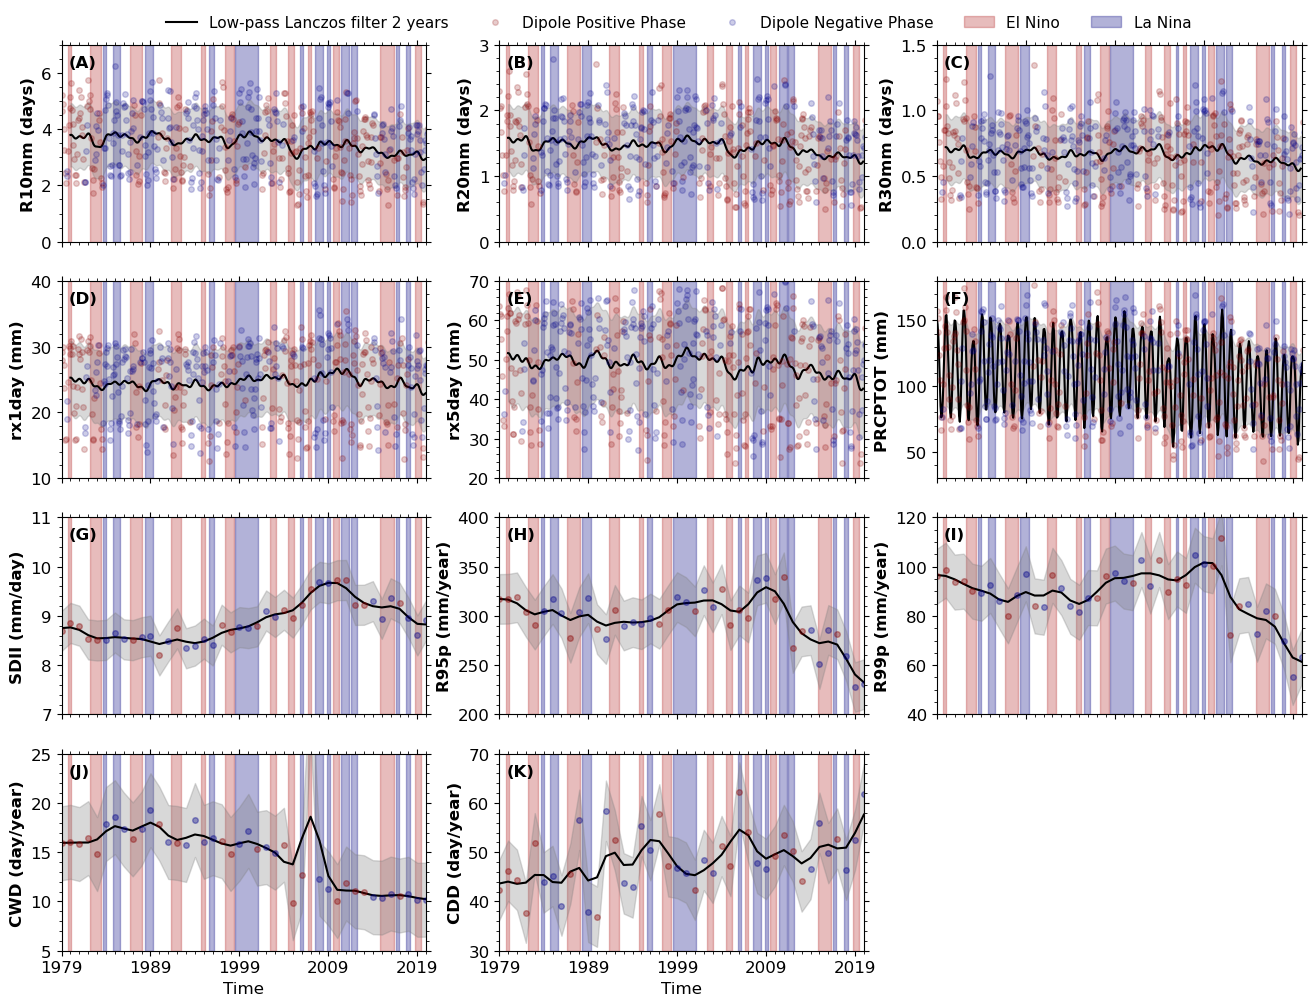

In [350]:
points = False
fig, axs = plt.subplots(figsize=(16, 12), nrows=4,
                        ncols=3, sharex=True, dpi=100)
axs = axs.flatten()


var = 'r10mm'
# Plot the time series
plot_ts(df, axs[0], var, color='k', label=var, points=True)
stripes(df, axs[0], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[0].fill_between(df.index, df[var] - ((max_ + min_)/2),
#                  df[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[0].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)
axs[0].set_ylim(0, 7)
axs[0].set_ylabel('R10mm (days)', fontsize=12, fontweight='bold')

var = 'r20mm'
# Plot the time series
plot_ts(df, axs[1], var, color='k', label=var, points=True)
stripes(df, axs[1], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[1].fill_between(df.index, df[var] - ((max_ + min_)/2),
#                  df[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[1].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)
axs[1].set_ylim(0, 3)
axs[1].set_ylabel('R20mm (days)', fontsize=12, fontweight='bold')

var = 'r30mm'
# Plot the time series
plot_ts(df, axs[2], var, color='k', label=var, points=True)
stripes(df, axs[2], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[2].fill_between(df.index, df[var] - ((max_ + min_)/2),
#                  df[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[2].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)
axs[2].set_ylim(0, 1.5)
axs[2].set_ylabel('R30mm (days)', fontsize=12, fontweight='bold')

var = 'rx1day'
# Plot the time series
plot_ts(df, axs[3], var, color='k', label=var, points=True)
stripes(df, axs[3], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[3].fill_between(df.index, df[var] - ((max_ + min_)/2),
#                  df[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[3].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)
axs[3].set_ylim(10, 40)
axs[3].set_ylabel('rx1day (mm)', fontsize=12, fontweight='bold')

var = 'rx5day'
# Plot the time series
plot_ts(df, axs[4], var, color='k', label=var, points=True)
stripes(df, axs[4], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
# Fill time series by bootstrap interval
# axs[4].fill_between(df.index, df[var] - ((max_ + min_)/2),
#                  df[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[4].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)
axs[4].set_ylim(20, 70)
axs[4].set_ylabel('rx5day (mm)', fontsize=12, fontweight='bold')

var = 'prcptot'
# Plot the time series
plot_ts(df, axs[5], var, color='k',
        label=var, filter=False, points=True)
stripes(df, axs[5], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)

# Fill time series by bootstrap interval
# axs[5].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[5].fill_between(df.index, filter - df[var].std(),
                    filter + df[var].std(), color='grey', alpha=0.3)
axs[5].set_ylim(30, 180)
axs[5].set_ylabel('PRCPTOT (mm)', fontsize=12, fontweight='bold')

var = 'sdii'
# Plot the time series
plot_ts(df_year_new, axs[6], var, color='k',
        label=var, filter=False, points=True)
stripes(df, axs[6], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df_year_new, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
df_year_new.where(df_year_new['Dipolo'] == 'Fase Positiva').plot(ax=axs[6], y=var, style='o', markersize=4,
                                                        label='Dipole Positive Phase', color='darkred', alpha=0.2, legend=False)
df_year_new.where(df_year_new['Dipolo'] == 'Fase Negativa').plot(ax=axs[6], y=var, style='o', markersize=4,
                                                        label='Dipole Negative Phase', color='darkblue', alpha=0.2, legend=False)
# Fill time series by bootstrap interval
# axs[6].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[6].fill_between(df_year_new.index, df_year_new[var] - df_year_new[var].std(),
                    df_year_new[var] + df_year_new[var].std(), color='grey', alpha=0.3)
axs[6].set_ylim(7, 11)
axs[6].set_ylabel('SDII (mm/day)', fontsize=12, fontweight='bold')

var = 'r95p'
# Plot the time series
plot_ts(df_year_new, axs[7], var, color='k', label=var, filter=False, points=True)
stripes(df, axs[7], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df_year_new, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
df_year_new.where(df_year_new['Dipolo'] == 'Fase Positiva').plot(ax=axs[7], y=var, style='o', markersize=4,
                                                        label='Dipole Positive Phase', color='darkred', alpha=0.2, legend=False)
df_year_new.where(df_year_new['Dipolo'] == 'Fase Negativa').plot(ax=axs[7], y=var, style='o', markersize=4,
                                                        label='Dipole Negative Phase', color='darkblue', alpha=0.2, legend=False)
# Fill time series by bootstrap interval
# axs[7].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[7].fill_between(df_year_new.index, df_year_new[var] - df_year_new[var].std(),
                    df_year_new[var] + df_year_new[var].std(), color='grey', alpha=0.3)

axs[7].set_ylim(200, 400)
axs[7].set_ylabel('R95p (mm/year)', fontsize=12, fontweight='bold')

var = 'r99p'
# Plot the time series
plot_ts(df_year_new, axs[8], var, color='k', label=var, filter=False, points=True)
stripes(df, axs[8], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df_year_new, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
df_year_new.where(df_year_new['Dipolo'] == 'Fase Positiva').plot(ax=axs[8], y=var, style='o', markersize=4,
                                                        label='Dipole Positive Phase', color='darkred', alpha=0.2, legend=False)
df_year_new.where(df_year_new['Dipolo'] == 'Fase Negativa').plot(ax=axs[8], y=var, style='o', markersize=4,
                                                        label='Dipole Negative Phase', color='darkblue', alpha=0.2, legend=False)
# Fill time series by bootstrap interval
# axs[8].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)   
axs[8].fill_between(df_year_new.index, df_year_new[var] - df_year_new[var].std(),
                        df_year_new[var] + df_year_new[var].std(), color='grey', alpha=0.3)
axs[8].set_ylim(40, 120)
axs[8].set_ylabel('R99p (mm/year)', fontsize=12, fontweight='bold')

var = 'cwd'
# Plot the time series
plot_ts(df_year_new, axs[9], var, color='k', label=var, filter=False, points=True)
stripes(df, axs[9], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df_year_new, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
df_year_new.where(df_year_new['Dipolo'] == 'Fase Positiva').plot(ax=axs[9], y=var, style='o', markersize=4,
                                                        label='Dipole Positive Phase', color='darkred', alpha=0.2, legend=False)
df_year_new.where(df_year_new['Dipolo'] == 'Fase Negativa').plot(ax=axs[9], y=var, style='o', markersize=4,
                                                        label='Dipole Negative Phase', color='darkblue', alpha=0.2, legend=False)
# Fill time series by bootstrap interval
# axs[9].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[9].fill_between(df_year_new.index, df_year_new[var] - df_year_new[var].std(),
                        df_year_new[var] + df_year_new[var].std(), color='grey', alpha=0.3)
axs[9].set_ylim(5, 25)
axs[9].set_ylabel('CWD (day/year)', fontsize=12, fontweight='bold')

var = 'cdd'
# Plot the time series
plot_ts(df_year_new, axs[10], var, color='k', label=var, filter=False, points=True)
stripes(df, axs[10], idx_nino_start, idx_nino_end,
        color_nino='firebrick', color_nina='navy', alpha=0.3)
filter = LowPassFilter(df_year_new, y=var)
max_, min_ = bootstrap_interval(filter, n=1000, alpha=0.05)
df_year_new.where(df_year_new['Dipolo'] == 'Fase Positiva').plot(ax=axs[10], y=var, style='o', markersize=4,
                                                        label='Dipole Positive Phase', color='darkred', alpha=0.2, legend=False)
df_year_new.where(df_year_new['Dipolo'] == 'Fase Negativa').plot(ax=axs[10], y=var, style='o', markersize=4,
                                                        label='Dipole Negative Phase', color='darkblue', alpha=0.2, legend=False)
# Fill time series by bootstrap interval
# axs[10].fill_between(df_year.index, df_year[var] - ((max_ + min_)/2),
#                  df_year[var] + ((max_ + min_)/2), color='grey', alpha=0.5)
axs[10].fill_between(df_year_new.index, df_year_new[var] - df_year_new[var].std(),
                        df_year_new[var] + df_year_new[var].std(), color='grey', alpha=0.3)
axs[10].set_ylim(30, 70)
axs[10].set_ylabel('CDD (day/year)', fontsize=12, fontweight='bold')

# del last axis
plt.delaxes(axs[11])

# Change xticks frequency
axs[10].set_xticks(axs[10].get_xticks()[::2])

# Legenda
handles, labels = axs[10].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys(), loc='upper left',
              frameon=False, ncol=5, fontsize=11, bbox_to_anchor=(0.25, 1.22))
# axs[11].set_xlim('1978-12-31', '2020-01-01')

ABC = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)',
       '(G)', '(H)', '(I)', '(J)', '(K)']
for text, ax in zip(ABC, fig.axes):
    ax.text(0.02, 0.95, text, transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top')

fig.set_facecolor('white')

# # Save figure
# fig.savefig('Time_Series_Prec_Indices_SA.png', dpi=300, bbox_inches='tight', facecolor='white')
